In [1]:
import pandas as pd
import numpy as np

In [2]:
print("first 3 articles")

article_csv = './data/articles-100000.csv'
articles_df = pd.read_csv(article_csv)
articles_df[:10]

first 3 articles


,article_id,article_url
0,1,https://www.theguardian.com/commentisfree/2012...
1,2,article_url
2,3,https://www.theguardian.com/business/2012/feb/...
3,4,https://www.theguardian.com/travel/2012/feb/08...
4,5,https://www.theguardian.com/lifeandstyle/2012/...
5,6,https://www.theguardian.com/fashion/2012/feb/0...
6,7,https://www.theguardian.com/theguardian/2012/f...
7,8,https://www.theguardian.com/lifeandstyle/2012/...
8,9,https://www.theguardian.com/lifeandstyle/house...
9,10,https://www.theguardian.com/commentisfree/2012...


In [3]:
print("first 3 authors")

authors_csv = './data/authors-100000.csv'
authors_df = pd.read_csv(authors_csv)
authors_df[:3]

first 3 authors


,author_id,comment_author
0,1,rosieh2
1,2,asgoodasitgets
2,3,Mendoza


In [4]:
print("first 20 comments")

comments_csv = './data/sorted_comments-100000.csv'
comments_df = pd.read_csv(comments_csv)
comments_df[:3]

first 20 comments


,article_id,author_id,comment_id,comment_text,parent_comment_id,timestamp,upvotes
0,1,1,14606180,So you are saying that the demonisation of fem...,NaN,2012-02-11T12:49:42Z,0
1,1,1,14605967,So you are explicitly saying that it is not ok...,14605336.0,2012-02-11T12:29:29Z,0
2,1,1,14605172,So we have given up on the reasoned debate the...,14605044.0,2012-02-11T11:15:06Z,0


In [5]:
print("join comments and authors")

comments_and_authors = pd.merge(comments_df,authors_df, on='author_id')

comments_and_authors[:10]

join comments and authors


,article_id,author_id,comment_id,comment_text,parent_comment_id,timestamp,upvotes,comment_author
0,1,1,14606180,So you are saying that the demonisation of fem...,NaN,2012-02-11T12:49:42Z,0,rosieh2
1,1,1,14605967,So you are explicitly saying that it is not ok...,14605336.0,2012-02-11T12:29:29Z,0,rosieh2
2,1,1,14605172,So we have given up on the reasoned debate the...,14605044.0,2012-02-11T11:15:06Z,0,rosieh2
3,1,1,14605013,Because some of the points that they raise are...,14604896.0,2012-02-11T10:58:42Z,0,rosieh2
4,1,1,14604852,I am not missing the point. I am not criticisi...,14604770.0,2012-02-11T10:42:35Z,0,rosieh2
5,1,1,14604722,It might be helpful for me to summarise the th...,NaN,2012-02-11T10:25:55Z,0,rosieh2
6,1,1,14604498,Re. the kitchen issue - I could not agree with...,14599303.0,2012-02-11T10:01:06Z,0,rosieh2
7,1,1,14604489,Why should it be down to to how much women wan...,14599393.0,2012-02-11T09:59:19Z,0,rosieh2
8,1,1,14604466,I know they can do that but the consensus we s...,14598176.0,2012-02-11T09:57:17Z,0,rosieh2
9,1,1,14597711,I'm called away to a Valentine's Day dinner......,NaN,2012-02-10T18:15:51Z,0,rosieh2


In [6]:
import operator

print("The authors and their number of commented articles")

authorsCommentCount = {}

for index, row in comments_and_authors.iterrows():
    try:
        authorsCommentCount[int((row['author_id']))] += 1
    except:
        authorsCommentCount[int((row['author_id']))] = 1
        
        
authorsIDNumberOfComments = {'author_id': list(authorsCommentCount.keys()), 'number_comments': list(authorsCommentCount.values())}

authorsIDNumberOfComments_df = pd.DataFrame(authorsIDNumberOfComments)

# authorsIDNumberOfComments_df[:20]

authorsAndNumberOfComments_df = pd.merge(authorsIDNumberOfComments_df,authors_df, on='author_id')

authorsAndNumberOfComments_df_sorted = authorsAndNumberOfComments_df.sort_values('number_comments', ascending=False)

authorsAndNumberOfComments_df_sorted[:10]




The authors and their number of commented articles


,author_id,number_comments,comment_author
151,154,346,kizbot
760,768,174,Toadjuggler
2029,2055,164,mikeeverest
394,398,154,Clunie
401,405,135,Bjerkley
573,578,134,AllyF
524,529,126,KrustytheKlown
2957,2998,123,Ghostworld
2773,2810,116,DocMolotov
508,513,109,insertfunnyusername


In [7]:
from dateutil import parser

hours = {}

for index, row in list(comments_and_authors.iterrows())[:]:
    h = parser.parse(row['timestamp']).hour
    try:
        hours[h] += 1
    except:
        hours[h] = 1

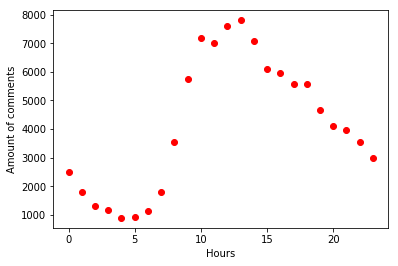

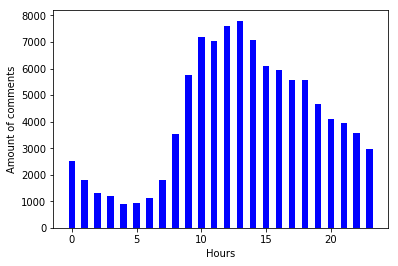

In [13]:
import matplotlib.pyplot as plt

yLabel = 'Amount of comments'
xLabel = 'Hours'

plt.ylabel(yLabel)
plt.xlabel(xLabel)
plt.plot(list(hours.keys()), list(hours.values()), 'ro')
plt.show()

plt.ylabel(yLabel)
plt.xlabel(xLabel)
plt.bar(list(hours.keys()), list(hours.values()), width=0.5, color="blue")
plt.show()

In [9]:
# Get the data sorted
comments_df['timestamp'] = pd.to_datetime(comments_df.timestamp)
comments_sorted = comments_df.sort_values('timestamp')

comments_total = {}

# Get parent comments
for index, row in list(comments_sorted.iterrows())[:]:
    try:
        int((row['parent_comment_id']))
        comments_total[row['parent_comment_id']]['viral'][row['comment_id']] = {'timestamp': row['timestamp'], 'parent_id': int(row['parent_comment_id'])} 
    except:
        comments_total[row['comment_id']] = {'timestamp': row['timestamp'], 'parent_id': -1, 'viral':{}}

# Extract data
viral_comments = {}
viral_min = 20
viral_year = 2017

for comment_id in comments_total:
    if len(comments_total[comment_id]['viral'].keys()) >= viral_min and comments_total[comment_id]['timestamp'].year == viral_year:
        viral_comments[comment_id] = {}
        viral_comments[comment_id].update(comments_total[comment_id])


In [10]:
comments_article_total = {}

# Get parent comments
for index, row in list(comments_sorted.iterrows())[:]:
    if row['article_id'] in comments_article_total:
        comments_article_total[row['article_id']]['viral'][row['comment_id']] = {'timestamp': row['timestamp']} 
    else:
        comments_article_total[row['article_id']] = {'timestamp': row['timestamp'], 'viral':{}}

# Extract data
comments_article = {}
min_comments = 250
year_article = 2017

for cid in comments_article_total:
    has_comments = len(comments_article_total[cid]['viral'].keys()) >= min_comments
    is_year = comments_article_total[cid]['timestamp'].year == year_article
    if has_comments and is_year:
        comments_article[cid] = {}
        comments_article[cid].update(comments_article_total[cid])


In [11]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
from datetime import datetime, timedelta
import datetime

init_notebook_mode(connected=True)

def to_unix_time(dt):
    epoch =  datetime.datetime.utcfromtimestamp(0)
    return (dt - epoch).total_seconds() * 1000

def middle_dt(dt1, dt2):
    epoch =  datetime.datetime.utcfromtimestamp(0)
    dt1_sec = (dt1 - epoch).total_seconds()
    dt2_sec = (dt2 - epoch).total_seconds()
    dt_diff = (dt2_sec - dt1_sec)/2
    return (dt1_sec + dt_diff) * 1000

def get_shapes(comment):
    child_count = len(comment['viral'])
    t1 = comment['timestamp']
    x1 = to_unix_time(t1)
    shapes = []
    
    for xn in comment['viral']:
        t2 = comment['viral'][xn]['timestamp']
        x2 = to_unix_time(t2)
        h = middle_dt(t1, t2)
        shape = {
            'type': 'path',
            'path': 'M ' + str(x1) + ',0 Q '+ str(h) +', 1 ' + str(x2) + ',0',
            'line': {
                'color': 'blue',
            },
            'opacity': float(child_count)/100,
        }
        shapes.append(shape)
        
    return shapes


# Code

x_values = []
y_values = []

x_min = None
x_max = None
shapes = []

for cid in sorted(viral_comments, key=lambda x: viral_comments[x]['timestamp']):
    
    # Set min
    if x_min == None:
        x_min = viral_comments[cid]['timestamp']
        x_max = x_min
    
    # Search for max in nested sub dictionary
    for sub_id in viral_comments[cid]['viral']:
        if x_max < viral_comments[cid]['viral'][sub_id]['timestamp']:
            x_max = viral_comments[cid]['viral'][sub_id]['timestamp']

    # Set svg shapes
    shapes.extend(get_shapes(viral_comments[cid]))

# Add some padding for x-axis
x_min = x_min - timedelta(hours=1)
x_max = x_max + timedelta(hours=1)

data = [go.Scatter()]
layout = {
    'xaxis': {
        'type': 'date',
        'range': [
            to_unix_time(x_min),
            to_unix_time(x_max)],
        'zeroline': False,
    },
    'yaxis': {
        'showgrid': False,
        'showticklabels': False
    },
    'shapes': shapes
}

fig = { 'data': data,'layout': layout, }

iplot(fig)

In [16]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
from datetime import datetime, timedelta
import datetime

init_notebook_mode(connected=True)

def to_unix_time(dt):
    epoch =  datetime.datetime.utcfromtimestamp(0)
    return (dt - epoch).total_seconds() * 1000

def middle_dt(dt1, dt2):
    epoch =  datetime.datetime.utcfromtimestamp(0)
    dt1_sec = (dt1 - epoch).total_seconds()
    dt2_sec = (dt2 - epoch).total_seconds()
    dt_diff = (dt2_sec - dt1_sec)/2
    return (dt1_sec + dt_diff) * 1000

def get_shapes(comment):
    child_count = len(comment['viral'])
    t1 = comment['timestamp']
    x1 = to_unix_time(t1)
    shapes = []
    
    for xn in comment['viral']:
        t2 = comment['viral'][xn]['timestamp']
        x2 = to_unix_time(t2)
        h = middle_dt(t1, t2)
        shape = {
            'type': 'path',
            'path': 'M ' + str(x1) + ',0 Q '+ str(h) +', 1 ' + str(x2) + ',0',
            'line': {
                'color': 'blue',
            },
            'opacity': float(child_count)/10000,
        }
        shapes.append(shape)
        
    return shapes


# Code

x_values = []
y_values = []

x_min = None
x_max = None
shapes = []

for cid in list(sorted(comments_article, key=lambda x: comments_article[x]['timestamp']))[:2]:
    
    # Set min
    if x_min == None:
        x_min = comments_article[cid]['timestamp']
        x_max = x_min
    
    # Search for max in nested sub dictionary
    for sub_id in comments_article[cid]['viral']:
        if x_max < comments_article[cid]['viral'][sub_id]['timestamp']:
            x_max = comments_article[cid]['viral'][sub_id]['timestamp']

    # Set svg shapes
    shapes.extend(get_shapes(comments_article[cid]))

# Add some padding for x-axis
x_min = x_min - timedelta(hours=1)
x_max = x_max + timedelta(hours=1)

print x_min
print x_max

data = [go.Scatter()]
layout = {
    'xaxis': {
        'type': 'date',
        'range': [
            to_unix_time(x_min),
            to_unix_time(x_max)],
        'zeroline': False,
    },
    'yaxis': {
        'showgrid': False,
        'showticklabels': False
    },
    'shapes': shapes
}

fig = { 'data': data,'layout': layout, }

iplot(fig)

2017-01-13 17:16:39
2017-01-17 09:29:40
